1. Investigate the data, and do any necessary data cleaning.
2. Explore the data and find some variables that you think would be useful in predicting house prices.
3. Build your initial model using these features and estimate the parameters using OLS.

Spend up to 4 hours on this assignment.

In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# import dataset
df = pd.read_csv(r'C:\Users\AP\Downloads\house prices.csv')

## 1. EXPLORATORY DATA ANALYSIS

--------------------------

In [3]:
# sample view of dataset
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
# columns to lower case
df.columns = map(str.lower, df.columns)

In [5]:
# basic size and shape of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [6]:
# check for inconsistencies/extra spaces
df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

In [7]:
# check for missing data
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['total nan', 'percent nan'])
missing_data.head(10)

,total nan,percent nan
poolqc,1453,0.995205
miscfeature,1406,0.963014
alley,1369,0.937671
fence,1179,0.807534
fireplacequ,690,0.472603
lotfrontage,259,0.177397
garagecond,81,0.055479
garagetype,81,0.055479
garageyrblt,81,0.055479
garagefinish,81,0.055479


#### Only 6 out of 80 features have missing values more than 10%. Off the bat these features do not seem likely to be highly correlated with the target variable. Let's plot a correlation matrix before we spend time cleaning nulls that may not need cleaning. If it turns out any of these features are of interest, we will deal with missing values then.

#### Because this is a large and diverse dataset, there are some features that are numerical and some that are alpha. We need to convert the non-numerical columns to numerical so that we can use these features in our comparisons and calculations. 

In [8]:
# list/number of numerical columns
num_col = df.select_dtypes(['int64', 'float64']).columns

print(num_col)
print("Numerical columns: {}".format(len(num_col)))

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea',
       'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')
Numerical columns: 38


In [9]:
# list/number of alpha columns
alpha_col = df.select_dtypes(['object']).columns

print(alpha_col)
print("Non-numerical columns: {}".format(len(alpha_col)))

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')
Non-numerical columns: 43


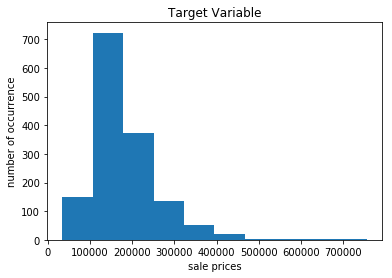

Sale Price JB test stat: 3438.8721241220583 /// p value: 0.0


In [10]:
# distribution of target variable
plt.hist(df.saleprice)

plt.title('Target Variable')
plt.xlabel("sale prices")
plt.ylabel('number of occurrence')

plt.show()

# JB test to check for normality
from scipy.stats import jarque_bera
jb_stats = jarque_bera(df['saleprice'])
print('Sale Price JB test stat: {0} /// p value: {1}'.format(jb_stats[0], jb_stats[1]))

#### Target variable is not normally distributed.

## 2. FEATURE SELECTION

---------------------------

In [11]:
# correlation with target variable
df[num_col].iloc[:,1:].corr().loc[:,'saleprice'].sort_values(ascending=False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
1stflrsf         0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
2ndflrsf         0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
screenporch      0.111447
poolarea         0.092404
mosold           0.046432
3ssnporch        0.044584
bsmtfinsf2      -0.011378
bsmthalfbath    -0.016844
miscval         -0.021190
lowqualfinsf    -0.025606
yrsold          -0.028923
overallcond     -0.077856
mssubclass      -0.084284
enclosedporch   -0.128578
kitchenabvgr    -0.135907
Name: saleprice, dtype: float64

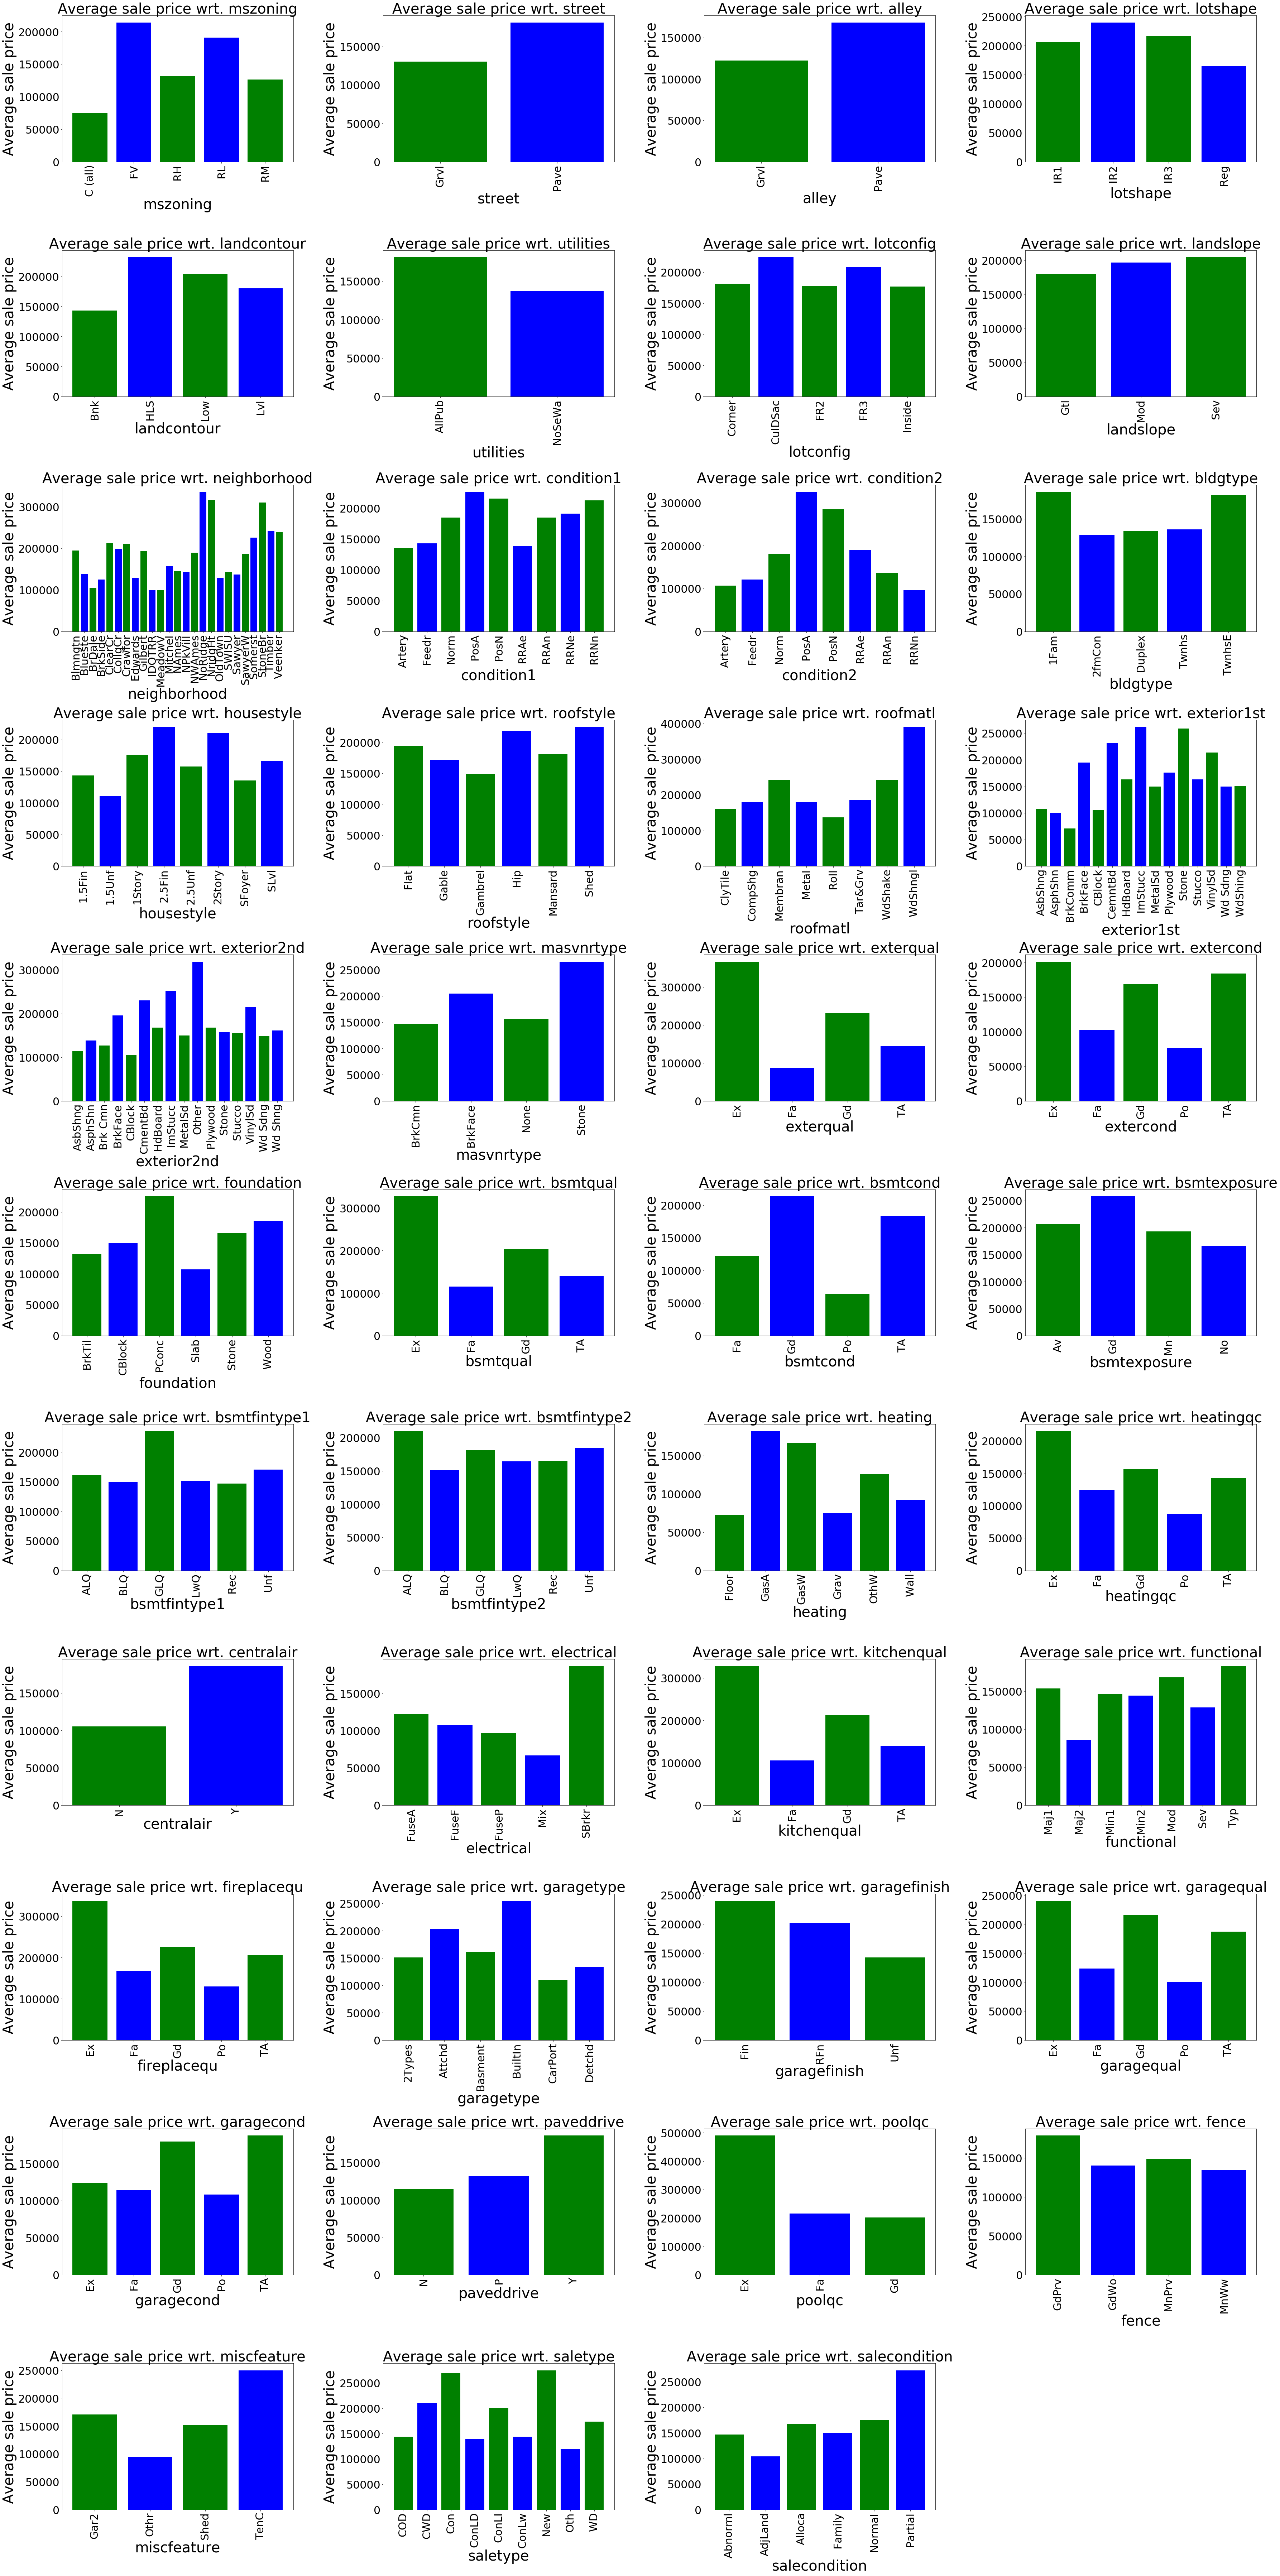

In [12]:
# bar chart relationship between target variable and alpha features
plt.figure(figsize=(50,100))

for index, column in enumerate(alpha_col):
    plt.subplot(11,4,index+1)
    plt.bar(df.groupby(column)["saleprice"].mean().index, df.groupby(column)["saleprice"].mean(), color=("green","blue"))
    plt.title("Average sale price wrt. {}".format(column), fontsize=40)
    plt.ylabel("Average sale price", fontsize=40)
    plt.xlabel(column, fontsize=40)
    plt.xticks(rotation='vertical')
    plt.tick_params(labelsize=30)

plt.tight_layout()
plt.show()

#### From the above charts, mszoning, neighborhood, and exterior1st all appear to have high variance with the target variable, implying there could be a correlation there. We will keep these three features and turn them into binary variables. 

In [13]:
# convert alpha features to binary
df['mszoning'] = pd.get_dummies(df.mszoning, drop_first=True)
df['neighborhood'] = pd.get_dummies(df.neighborhood, drop_first=True)
df['exterior1st'] = pd.get_dummies(df.exterior1st, drop_first=True)

#### There are now 6 features we are keeping for the model. Three that were originally numerical and had high correlation with the target variable - overallqual, grlivarea, garagecars. And three from the alpha columns that showed high variance with sale price - mzoning, neighborhood, exterior1st.

## 3. LINEAR REGRESSION MODEL AND OLS PARAMETERS

--------------------------------

In [14]:
# define variables for model
X = df[['overallqual', 'grlivarea', 'garagecars', 'mszoning', 'neighborhood', 'exterior1st']]
Y = df.saleprice

# linear regression model
lrm = linear_model.LinearRegression()

# fit method estimates coefficients using OLS
lrm.fit(X, Y)

# results
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 27376.46862964     50.29076183  21328.1723526   -8029.30492406
 -39911.74536606 -21032.87386767]

Intercept: 
 -99533.29696331921


#### The constant is -99,533 and the coefficients are listed in the same order above as in the code.

In [15]:
# OLS parameters
# create constant
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     688.8
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:59:49   Log-Likelihood:                -17561.
No. Observations:                1460   AIC:                         3.514e+04
Df Residuals:                    1453   BIC:                         3.517e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.953e+04   4872.194    -20.429      0.000   -1.09e+05      -9e+04
overallqual   2.738e+04   1087.034     25.185      0.000    2.52e+04    2.95e+04
grlivarea       50.2908      2.565     19.607      0.000      45.259      55.322
garagecars    2.133e+04   1810.777     11.778      0.000    1.78e+04    2.49e+04
mszoning     -8029.3049   5255.941     -1.528      0.127   -1.83e+04    2280.738
neighborhood -3.991e+04   2.87e+04     -1.389      0.165   -9.63e+04    1.65e+04
exterior1st  -2.103e+04   4.07e+04     -0.516      0.606   -1.01e+05    5.89e+04
==============================================================================
Omnibus:                      415.739   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9565.906
Skew:                           0.771   Prob(JB):                         0.00
Kurtosis:                      15.445   Cond. No.                     6.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""